In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def redondear_sig(numero, cifras=6):
    if numero == 0:
        return 0
    # Formula para obtener los decimales correctos basados en cifras significativas
    decimales = cifras - int(math.floor(math.log10(abs(numero)))) - 1
    return round(numero, decimales)

def calcular_briggs(n, iteraciones=5):
    temp = n
    for i in range(iteraciones):
        temp = math.sqrt(temp)
        temp = redondear_sig(temp, 6)
    
    resta = temp - 1
    factor_k = 1 / math.log(10)
    resultado_parcial = factor_k * resta
    
    return resultado_parcial * (2**iteraciones)


In [3]:
# Valores reales para comparar
logs_reales = {x: math.log10(x) for x in range(2, 10)}
k = 1 / math.log(10)

print(f"{'Num':<3} | {'Valor Aprox.':<16} | {'Error Relativo'}")
print("-" * 45)

mis_resultados = {}

# Calculo para 2
log_2 = calcular_briggs(2)
error_2 = abs(log_2 - logs_reales[2]) / logs_reales[2]
mis_resultados[2] = log_2
print(f"2   | {log_2:<16.6f} | {error_2:.2e}")

# Calculo para 3
log_3 = calcular_briggs(3)
error_3 = abs(log_3 - logs_reales[3]) / logs_reales[3]
mis_resultados[3] = log_3
print(f"3   | {log_3:<16.6f} | {error_3:.2e}")

# Calculo para 4 (usando propiedad log(2^2) = 2*log(2))
log_4 = 2 * mis_resultados[2]
error_4 = abs(log_4 - logs_reales[4]) / logs_reales[4]
print(f"4   | {log_4:<16.6f} | {error_4:.2e}")

# Calculo para 5 (usando propiedad log(10/2) = 1 - log(2))
log_5 = 1 - mis_resultados[2]
error_5 = abs(log_5 - logs_reales[5]) / logs_reales[5]
print(f"5   | {log_5:<16.6f} | {error_5:.2e}")

# Calculo para 6 (Opción A: Suma log(2) + log(3))
log_6_suma = mis_resultados[2] + mis_resultados[3]
error_6a = abs(log_6_suma - logs_reales[6]) / logs_reales[6]
print(f"6A  | {log_6_suma:<16.6f} | {error_6a:.2e} (Suma)")

# Calculo para 6 (Opción B: Usando el dato de la mantisa dado)
mantisa_dato = 1.0077696
r = mantisa_dato - 1
log_r = k * r
log_6_pista = (7 + log_r) / 9
error_6b = abs(log_6_pista - logs_reales[6]) / logs_reales[6]
print(f"6B  | {log_6_pista:<16.6f} | {error_6b:.2e} (Pista)")

# Calculo para 7
log_7 = calcular_briggs(7)
error_7 = abs(log_7 - logs_reales[7]) / logs_reales[7]
print(f"7   | {log_7:<16.6f} | {error_7:.2e}")

# Calculo para 8
log_8 = 3 * mis_resultados[2]
error_8 = abs(log_8 - logs_reales[8]) / logs_reales[8]
print(f"8   | {log_8:<16.6f} | {error_8:.2e}")

# Calculo para 9
log_9 = 2 * mis_resultados[3]
error_9 = abs(log_9 - logs_reales[9]) / logs_reales[9]
print(f"9   | {log_9:<16.6f} | {error_9:.2e}")

Num | Valor Aprox.     | Error Relativo
---------------------------------------------
2   | 0.304354         | 1.10e-02
3   | 0.485437         | 1.74e-02
4   | 0.608707         | 1.10e-02
5   | 0.695646         | 4.75e-03
6A  | 0.789791         | 1.50e-02 (Suma)
6B  | 0.778153         | 1.86e-06 (Pista)
7   | 0.871229         | 3.09e-02
8   | 0.913061         | 1.10e-02
9   | 0.970874         | 1.74e-02



El error máximo absoluto en [0.001, 1.0] es: 1.3326e-01


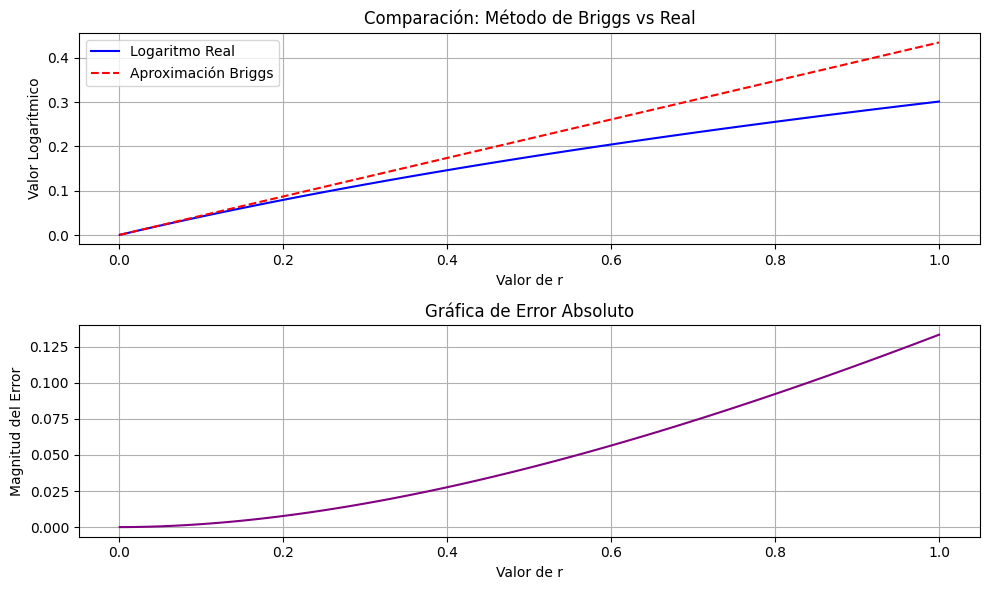

In [4]:
x_rango = np.linspace(0.001, 1.0, 100)

y_exacta = np.log10(1 + x_rango)
y_aprox = k * x_rango

errores = np.abs(y_exacta - y_aprox)

max_err = np.max(errores)
print(f"\nEl error máximo absoluto en [0.001, 1.0] es: {max_err:.4e}")

plt.figure(figsize=(10, 6))

# Primera gráfica: Comparación de curvas
plt.subplot(2, 1, 1)
plt.plot(x_rango, y_exacta, label='Logaritmo Real', color='blue')
plt.plot(x_rango, y_aprox, label='Aproximación Briggs', linestyle='--', color='red')
plt.title('Comparación: Método de Briggs vs Real')
plt.xlabel('Valor de r')
plt.ylabel('Valor Logarítmico')
plt.legend()
plt.grid(True)

# Segunda gráfica: Error
plt.subplot(2, 1, 2)
plt.plot(x_rango, errores, color='purple')
plt.title('Gráfica de Error Absoluto')
plt.xlabel('Valor de r')
plt.ylabel('Magnitud del Error')
plt.grid(True)

plt.tight_layout()
plt.show()